In [1]:
%load_ext autoreload
%autoreload 2

import teetool as tt
import numpy as np
import pandas as pd

In [2]:
# generate trajectory data
cluster_data_1 = tt.helpers.get_trajectories(ntype=0,
                                             ndim=2,
                                             ntraj=500,
                                             npoints=100,
                                             noise_std=0.0)

cluster_data_2 = tt.helpers.get_trajectories(ntype=1,
                                             ndim=2,
                                             ntraj=500,
                                             npoints=100,
                                             noise_std=0.0)

In [160]:
file_trajectories = "eddh"
# read data trajectories
df = pd.read_csv("data/{0}.csv".format(file_trajectories))

# rename columns
# df.rename(columns={'EASTINGS_M': 'x [m]',
#                    'NORTHINGS_M': 'y [m]',
#                    'ALTITUDE_M': 'z [m]'}, inplace=True)

cluster_data_list = []

count_total = 0

#for cluster_id in df.CLUSTER_ID.unique():
    # pass all clusters
    
dfc = df#[df["CLUSTER_ID"] == cluster_id]

cluster_data = []

for trajectory_id in dfc.flightid.unique():
    # pass all trajectories IN this cluster

    # extract values
    dft = dfc[dfc["flightid"] == trajectory_id]
    
    xn = dft["gs"].values
    yn = dft["altitude"].values # metre to hectrometre
    
    Yn = np.array([xn, yn]).T
    
    (npoints, ndim) = Yn.shape
    
    # assume linearly distributed points (no indication otherwise)
    xn = np.linspace(0, 1, npoints)

    # add tuple to list
    cluster_data.append((xn, Yn))

#print("{0}   {1}".format(cluster_id, len(cluster_data)))

count_total += len(cluster_data)

cluster_data_list.append(cluster_data)

print("---------- + \n     {0}".format(count_total))

---------- + 
     1061


In [161]:
# create a world
world = tt.World(name="toy", ndim=2, resolution=[100, 100])

#for i, cluster_data in enumerate(cluster_data_list[:5]):
world.addCluster(cluster_data_list[0], "0")

# add data
#world.addCluster(cluster_data_1, "one")
# world.addCluster(cluster_data_2, "two")

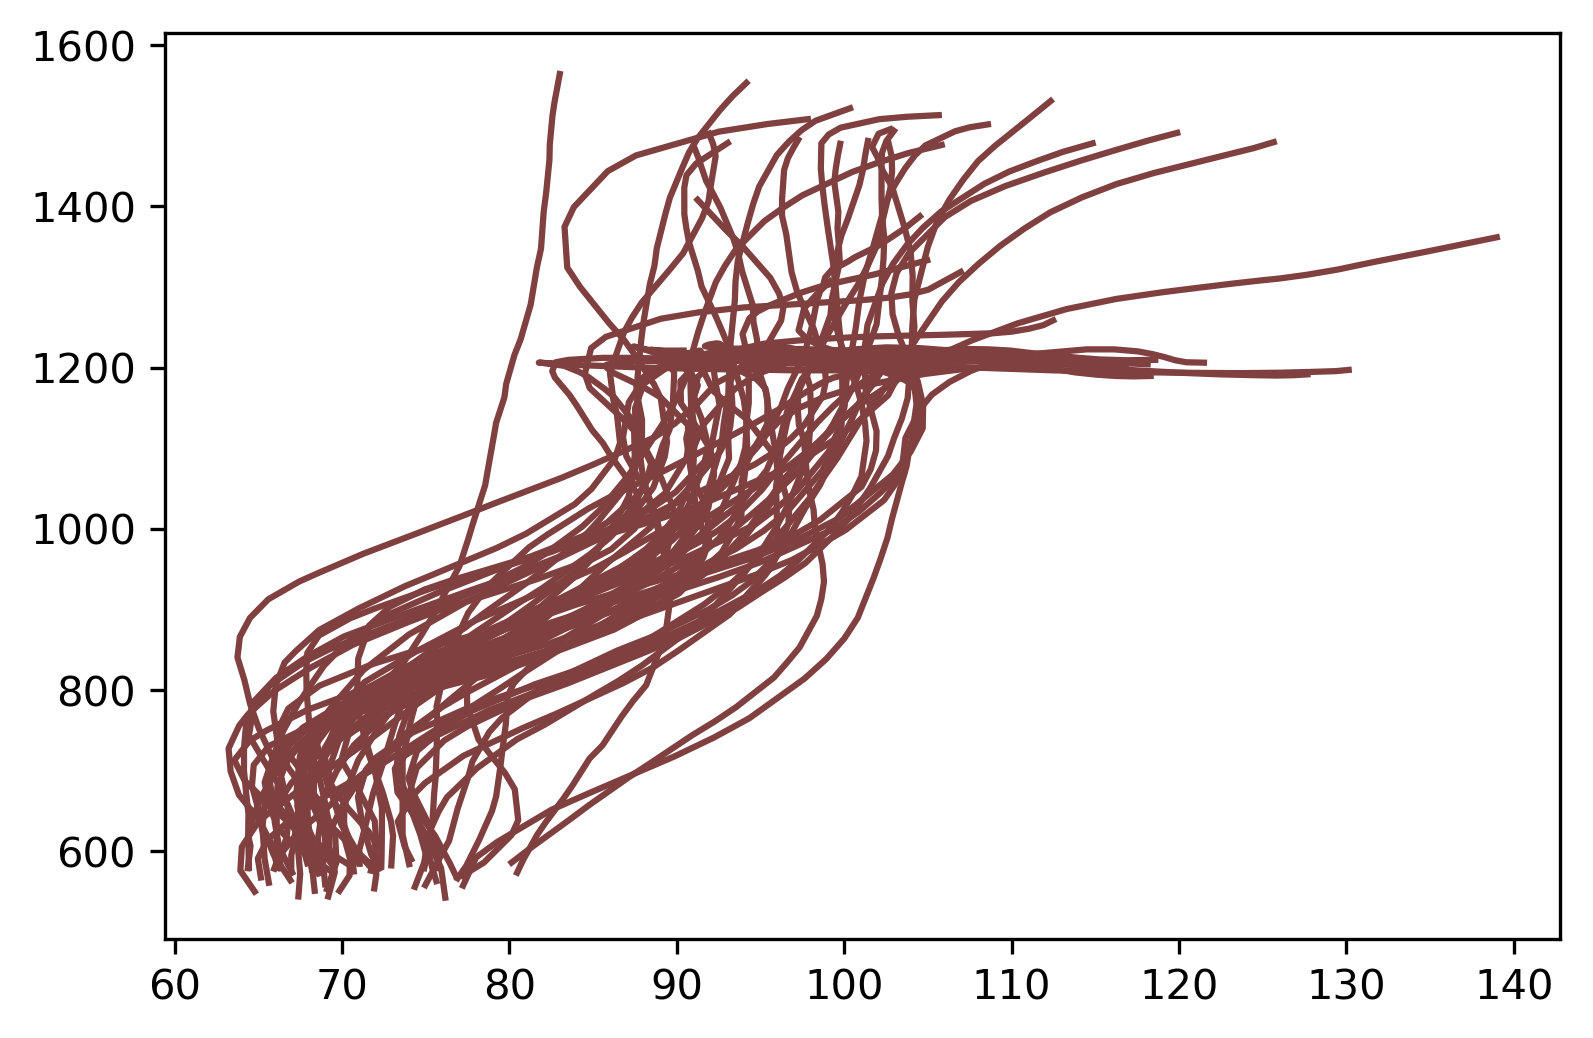

In [162]:
visual = tt.visual_2d.Visual_2d(world, dpi=300)

visual.plotTrajectories(ntraj=50)
visual.show()

In [157]:
def model_test(model_type, basis_type, nbasis, all = None):
    # build the model
    settings = {"model_type": model_type,
                "basis_type": basis_type,
                "nbasis": nbasis,
                "ngaus":100}
    
    world.buildModel(settings)
    
    x = np.array([0.0, 0.1, 0.2, 0.5])
    y = np.array([
          [0.98, 0.9]
        , [0.9, 0.7]
        , [0.8, 0.5]
        , [0.5, 0.1]
    ])
    
    #world.addObservation(icluster=0, observation = (x[:all], y[:all].reshape(-1,1, order='F')) )
    
    # visual
    visual = tt.visual_2d.Visual_2d(world, dpi=300)
    
    visual.plotTube(sdwidth=2)
    visual.plotSamples(ntraj=10)
    visual.show()
    

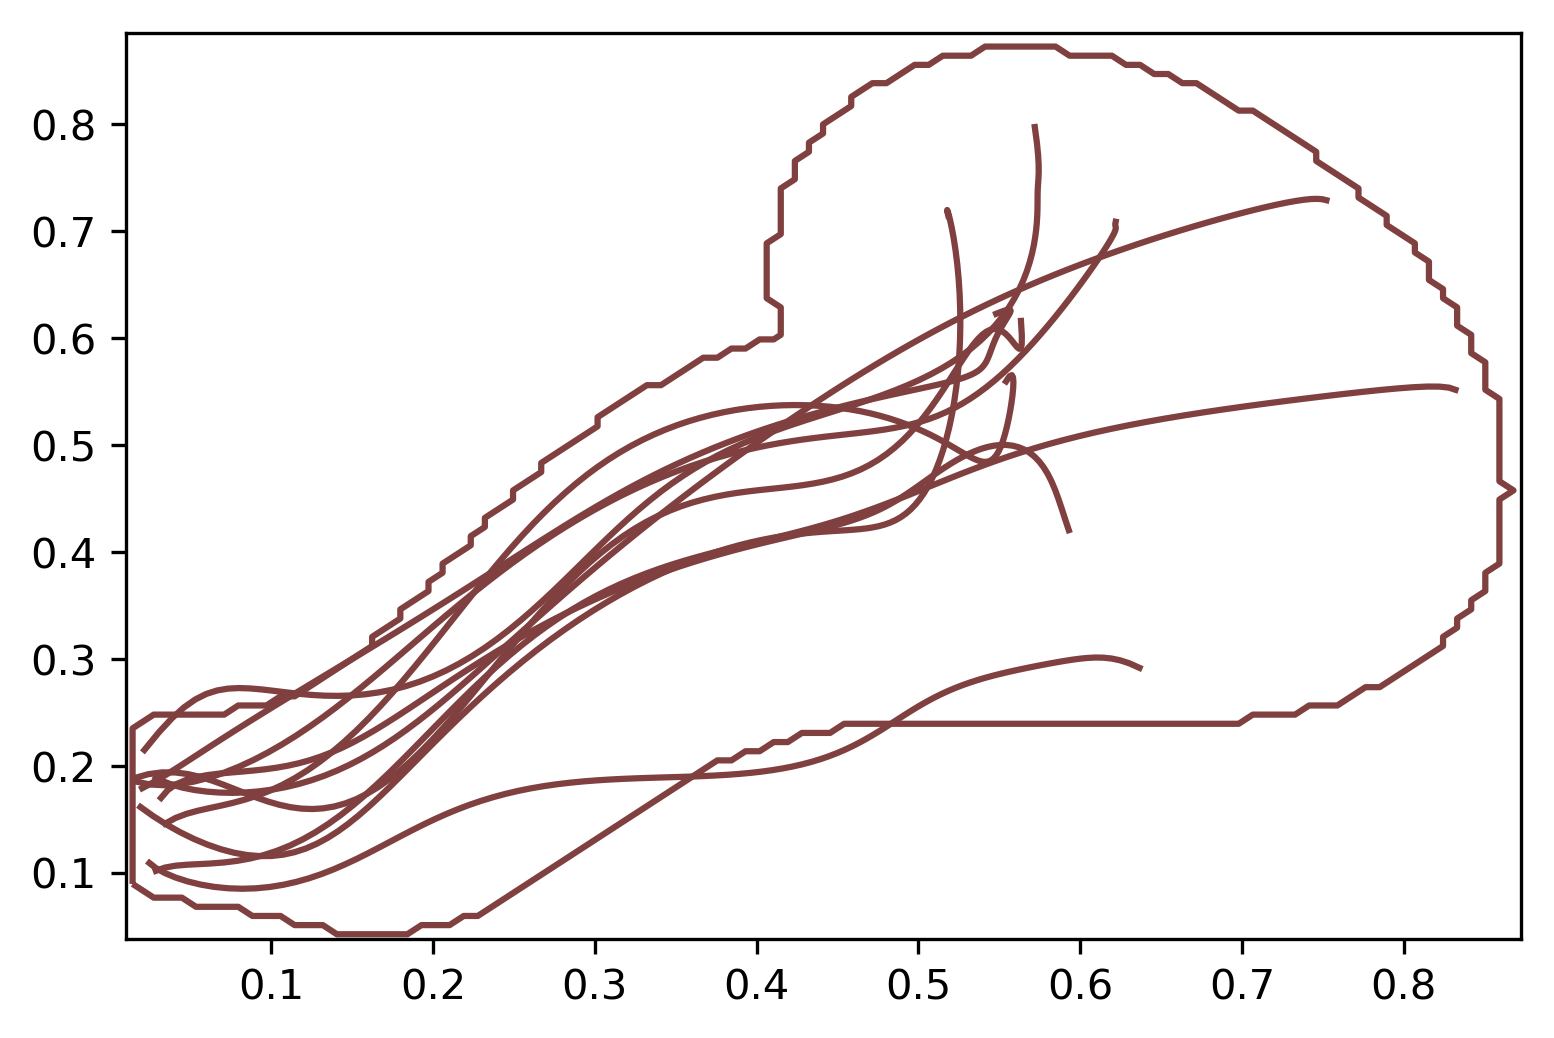

In [158]:
# model_test("EM", "bernstein", 10, 1)
# model_test("EM", "bernstein", 10, 2)
# model_test("EM", "bernstein", 10, 3)
# model_test("EM", "bernstein", 10, 4)
model_test("ML", "bernstein", 10)
# 
# model_test("EM", "bernstein", 15)
# model_test("ML", "bernstein", 15)
# 
# model_test("EM", "bernstein", 20)
# model_test("ML", "bernstein", 20)

In [150]:
x = np.array([0.0, 0.1, 0.2, 0.5])
y = np.array([
      [0.98, 0.9]
    , [0.9, 0.7]
    , [0.8, 0.5]
    , [0.5, 0.1]
])
print x[:None], y[:]